In [3]:
#Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
#Rastgele bir veri seti oluştur
np.random.seed(42) #To get same results using constant seed
n_samples = 100

#Undependent Variables
rooms = np.random.randint(1, 6, size = n_samples)
age = np.random.randint(1, 100, size = n_samples)
area = np.random.randint(50, 300, size = n_samples)

#Dependent Variables
price = (rooms * 10000) + (area * 300) - (age * 50) + np.random.normal(0, 5000, size = n_samples)

#Create dataset as a DataFrame
data = pd.DataFrame({'Rooms': rooms, 'Age': age, 'Area': area, 'Price': price})
print(data.head())

   Rooms  Age  Area          Price
0      4   28   179   95565.241555
1      5    7   269  135863.437327
2      3   73   103   48000.985314
3      5   72   136   93043.156217
4      5   12   278  127873.091014


In [9]:
#Dependent and undependent variables:
X = data[['Rooms', 'Age', 'Area']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
#Create Model
model = LinearRegression()

#Train Model
model.fit(X_train, y_train)

#Coefficients and intercept of the model
print("Coefficients (Katsayılar): ", model.coef_)
print("Intercept (Kesişim Noktası): ", model.intercept_)


Coefficients (Katsayılar):  [10109.14837854   -61.42769765   303.84876901]
Intercept (Kesişim Noktası):  -1450.380581675403


In [13]:
#Prediction on the test
y_pred = model.predict(X_test)

#MSE and R ** 2 score:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 26277801.05724252
R^2 Score: 0.9545121072152832


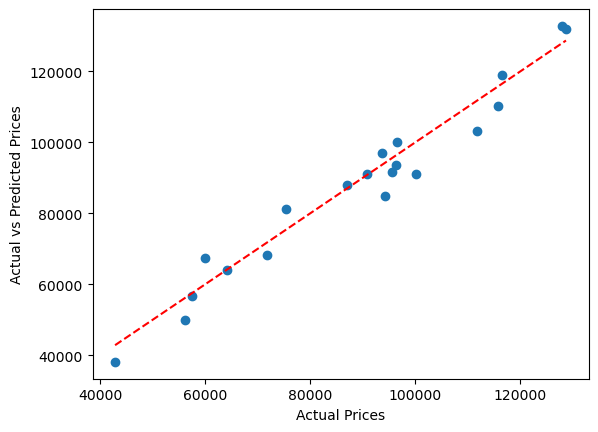

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Actual vs Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', linestyle = '--', label = 'Perfect Prediction Line')

In [17]:
#Sample House
new_house = pd.DataFrame([[3, 20, 120]], columns=["Rooms", "Age", "Area"])

#Cost Prediction
predicted_price = model.predict(new_house)
print(f"Predicted Price for the new house: {predicted_price[0]:.2f}")

Predicted Price for the new house: 64110.36
